In [29]:
%connect_info  #prints connection information
%qtconsole  

{
  "stdin_port": 41393, 
  "ip": "127.0.0.1", 
  "control_port": 49714, 
  "hb_port": 55932, 
  "signature_scheme": "hmac-sha256", 
  "key": "b3fdf7d2-2b0e-4043-bab9-f32f58fe6482", 
  "shell_port": 57709, 
  "transport": "tcp", 
  "iopub_port": 45087
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /home/obotvinnik/.local/share/jupyter/runtime/kernel-8711ba68-c7ce-49a6-8d33-e6d9799e7b54.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


In [30]:
from IPython.core.display import display, Javascript

def getname():
    display(Javascript('IPython.notebook.kernel.execute("theNotebook = " + \
    "\'"+IPython.notebook.notebook_name+"\'");'))
    return theNotebook

# Jakob
notebook_name = getname()

<IPython.core.display.Javascript object>

In [36]:
figure_folder = 'figures/{}'.format(notebook_name.split('.ipynb')[0])
! mkdir -p $figure_folder
figure_folder

'figures/014_compare_unstranded_splicing'

In [37]:
from __future__ import print_function

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

In [39]:
cd /home/obotvinnik/projects/singlecell_pnms/analysis/

/oasis/tscc/scratch/obotvinnik/projects/singlecell_pnms/analysis


In [40]:
! tree outrigger_v2_bam_unstranded

outrigger_v2_bam_unstranded
|-- junctions
|   `-- metadata.csv
`-- psi
    |-- mxe
    |   |-- psi.csv
    |   `-- summary.csv
    |-- outrigger_psi.csv
    `-- se
        |-- psi.csv
        `-- summary.csv

4 directories, 6 files


In [41]:
! wc -l outrigger_v2_bam/junctions/reads.csv

7395283 outrigger_v2_bam/junctions/reads.csv


In [42]:
! wc -l outrigger_v2/junctions/reads.csv

6882316 outrigger_v2/junctions/reads.csv


Why are these different?

In [43]:
names_to_directories = {'unstranded': 'outrigger_v2_bam_unstranded', 
                        'stranded_bam': 'outrigger_v2_bam', 
                        'stranded': 'outrigger_v2',
                        'stranded_rmdup': 'outrigger_v2_rmdup',
                        'unstranded_rmdup': 'outrigger_v2_rmdup_unstranded'}

In [44]:
psis = {}

for name, directory in names_to_directories.items():
    psis[name] = pd.read_csv('{}/psi/outrigger_psi.csv'.format(directory), index_col=0)


In [45]:
dfs = []

for name, directory in names_to_directories.items():
    print(name, directory)
    se = pd.read_csv('{}/psi/se/summary.csv'.format(directory))
    mxe = pd.read_csv('{}/psi/mxe/summary.csv'.format(directory))
    df = pd.concat([se, mxe], ignore_index=True)
    print('\t', df.shape)
    df['sample_id'] = df['sample_id'].map(lambda x: '_'.join(x.split('_')[:2]))
    df['dataset'] = name
    dfs.append(df)
summary = pd.concat(dfs, ignore_index=True)
#     summaries[name] = summary

print(summary.shape)
summary.head()

unstranded_rmdup outrigger_v2_rmdup_unstranded
	 (11121006, 11)
stranded_bam outrigger_v2_bam
	 (7820345, 11)
stranded outrigger_v2
	 (12567319, 11)
unstranded outrigger_v2_bam_unstranded
	 (12567319, 11)
stranded_rmdup outrigger_v2_rmdup
	 (7909447, 11)
(51985436, 12)


,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,sample_id,dataset
0,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_01,unstranded_rmdup
1,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_02,unstranded_rmdup
2,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_03,unstranded_rmdup
3,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_04,unstranded_rmdup
4,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_05,unstranded_rmdup


In [46]:
%time summary_dropna = summary.groupby(['dataset', 'event_id']).apply(lambda x: x.dropna(subset=['psi'], how='all'))
print(summary_dropna.shape)
summary_dropna.head()

CPU times: user 6min 8s, sys: 6.51 s, total: 6min 15s
Wall time: 14min 11s
(5274006, 12)


event_id  \
dataset  event_id                                                                                                         
stranded isoform1=junction:chr10:100189400-100190327:-|i... 18941384  isoform1=junction:chr10:100189400-100190327:-|...   
                                                            18941483  isoform1=junction:chr10:100189400-100190327:-|...   
                                                            18941543  isoform1=junction:chr10:100189400-100190327:-|...   
                                                            18941547  isoform1=junction:chr10:100189400-100190327:-|...   
                                                            18941552  isoform1=junction:chr10:100189400-100190327:-|...   

                                                                      incompatible_junction0  \
dataset  event_id                                                                              
stranded isoform1=junction:chr10:100189400-100190327:-|i... 18941384                     NaN   
                                                            18941483                     NaN   
                                                            18941543                     NaN   
                                                            18941547                     NaN   
                                                            18941552                     NaN   

                                                                      incompatible_junction1  \
dataset  event_id                                                                              
stranded isoform1=junction:chr10:100189400-100190327:-|i... 18941384                     NaN   
                                                            18941483                     NaN   
                                                            18941543                     NaN   
                                                            18941547                     NaN   
                                                            18941552                     NaN   

                                                                      isoform1_junction13  \
dataset  event_id                                                                           
stranded isoform1=junction:chr10:100189400-100190327:-|i... 18941384                  7.0   
                                                            18941483                  0.0   
                                                            18941543                  0.0   
                                                            18941547                 43.0   
                                                            18941552                103.0   

                                                                      isoform1_junction34  \
dataset  event_id                                                                           
stranded isoform1=junction:chr10:100189400-100190327:-|i... 18941384                  NaN   
                                                            18941483                  NaN   
                                                            18941543                  NaN   
                                                            18941547                  NaN   
                                                            18941552                  NaN   

                                                                      isoform2_junction12  \
dataset  event_id                                                                           
stranded isoform1=junction:chr10:100189400-100190327:-|i... 18941384                 15.0   
                                                            18941483                 65.0   
                                                            18941543                 12.0   
                                                            18941547                  0.0   
                                         

In [48]:
# %time summary_dropna = summary.groupby(['dataset', 'sample_id', 'event_id']).apply(lambda x: x.dropna(subset=['psi'], how='all'))
# print(summary_dropna.shape)
# summary_dropna.head()

In [49]:
wide_psi = summary_dropna.pivot_table(index=['sample_id', 'event_id'], columns='dataset', values='psi')
print(wide_psi.shape)
wide_psi = wide_psi.dropna(how='all')
print(wide_psi.shape)
wide_psi.head()

(1543408, 5)
(1543408, 5)


dataset                                                       stranded  \
sample_id event_id                                                       
CVN_01    isoform1=junction:chr10:101163392-101165512:-|i...  1.000000   
          isoform1=junction:chr10:101421386-101439481:+|i...  1.000000   
          isoform1=junction:chr10:101507148-101514285:+|i...  0.994118   
          isoform1=junction:chr10:101510154-101514285:+|i...  0.000000   
          isoform1=junction:chr10:102114390-102120490:+|i...  1.000000   

dataset                                                       stranded_bam  \
sample_id event_id                                                           
CVN_01    isoform1=junction:chr10:101163392-101165512:-|i...           NaN   
          isoform1=junction:chr10:101421386-101439481:+|i...           NaN   
          isoform1=junction:chr10:101507148-101514285:+|i...           NaN   
          isoform1=junction:chr10:101510154-101514285:+|i...           NaN   
          isoform1=junction:chr10:102114390-102120490:+|i...           1.0   

dataset                                                       stranded_rmdup  \
sample_id event_id                                                             
CVN_01    isoform1=junction:chr10:101163392-101165512:-|i...             NaN   
          isoform1=junction:chr10:101421386-101439481:+|i...             NaN   
          isoform1=junction:chr10:101507148-101514285:+|i...             1.0   
          isoform1=junction:chr10:101510154-101514285:+|i...             NaN   
          isoform1=junction:chr10:102114390-102120490:+|i...             1.0   

dataset                                                       unstranded  \
sample_id event_id                                                         
CVN_01    isoform1=junction:chr10:101163392-101165512:-|i...    1.000000   
          isoform1=junction:chr10:101421386-101439481:+|i...    1.000000   
          isoform1=junction:chr10:101507148-101514285:+|i...    0.994118   
          isoform1=junction:chr10:101510154-101514285:+|i...    0.000000   
          isoform1=junction:chr10:102114390-102120490:+|i...    1.000000   

dataset                                                       unstranded_rmdup  
sample_id event_id                                                              
CVN_01    isoform1=junction:chr10:101163392-101165512:-|i...               1.0  
          isoform1=junction:chr10:101421386-101439481:+|i...               NaN  
          isoform1=junction:chr10:101507148-101514285:+|i...               1.0  
          isoform1=junction:chr10:101510154-101514285:+|i...               0.0  
          isoform1=junction:chr10:102114390-102120490:+|i...               1.0

In [50]:
rps24_event = 'isoform1=junction:chr10:79797063-79800372:+|'\
'isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+'
rps24_event

'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+'

In [51]:
pkm_mxe_event = u'isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-'\
'|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-'
pkm_mxe_event

u'isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-'

In [52]:
idx = pd.IndexSlice

In [53]:
sample_ids = ['M6_04', 'P1_03']

In [54]:
wide_psi.loc[idx[:, rps24_event], :].head()

,dataset,stranded,stranded_bam,stranded_rmdup,unstranded,unstranded_rmdup
sample_id,event_id,,,,,
CVN_01,isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+,1.0,NaN,NaN,1.0,1.0
CVN_02,isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+,1.0,NaN,NaN,1.0,1.0
CVN_03,isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+,1.0,NaN,NaN,1.0,1.0
CVN_04,isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+,1.0,NaN,NaN,1.0,1.0
CVN_05,isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+,1.0,NaN,NaN,1.0,1.0


In [55]:
wide_psi.loc[idx[sample_ids, rps24_event], :]

,dataset,stranded,stranded_bam,stranded_rmdup,unstranded,unstranded_rmdup
sample_id,event_id,,,,,
M6_04,isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+,1.000000,NaN,NaN,1.000000,1.00000
P1_03,isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+,0.379856,NaN,NaN,0.379856,0.38006


In [56]:
summary.query('(sample_id in @sample_ids) & (event_id == @rps24_event)')

,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,sample_id,dataset
310789,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0.0,NaN,2207.0,2030.0,NaN,Case 7: Inclusion,1.000000,M6_04,unstranded_rmdup
310896,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,1026.0,NaN,570.0,688.0,NaN,Case 8: Sufficient reads on all junctions,0.380060,P1_03,unstranded_rmdup
19219062,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0.0,NaN,7107.0,6613.0,NaN,Case 8: Inclusion,1.000000,M6_04,stranded
19219146,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,1253.0,NaN,687.0,848.0,NaN,Case 9: Sufficient reads on all junctions,0.379856,P1_03,stranded
31786381,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0.0,NaN,7107.0,6613.0,NaN,Case 7: Inclusion,1.000000,M6_04,unstranded
31786465,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,1253.0,NaN,687.0,848.0,NaN,Case 8: Sufficient reads on all junctions,0.379856,P1_03,unstranded


In [57]:
wide_psi.loc[idx[:, pkm_mxe_event], :].head()

,dataset,stranded,stranded_bam,stranded_rmdup,unstranded,unstranded_rmdup
sample_id,event_id,,,,,
CVN_01,isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-,NaN,NaN,0.0,NaN,0.000
CVN_02,isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-,NaN,NaN,NaN,NaN,0.000
CVN_03,isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-,NaN,NaN,NaN,NaN,0.000
CVN_04,isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-,NaN,NaN,0.0,NaN,0.000
CVN_05,isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-,0.36478,NaN,NaN,0.36478,0.376


In [58]:
wide_psi.loc[idx[sample_ids, pkm_mxe_event], :]

,dataset,stranded,stranded_bam,stranded_rmdup,unstranded,unstranded_rmdup
sample_id,event_id,,,,,
M6_04,isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-,0.619425,NaN,NaN,0.619425,0.616249
P1_03,isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-,0.186158,NaN,NaN,0.186158,0.193182


In [59]:
summary.query('(sample_id in @sample_ids) & (event_id == @pkm_mxe_event)')

,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,sample_id,dataset
9511019,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,387.0,364.0,697.0,NaN,509.0,Case 8: Sufficient reads on all junctions,0.616249,M6_04,unstranded_rmdup
9511126,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,199.0,156.0,45.0,NaN,40.0,Case 8: Sufficient reads on all junctions,0.193182,P1_03,unstranded_rmdup
17999629,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,879.0,0.0,1603.0,NaN,0.0,Case 5: Unequal read coverage (one side has at...,NaN,M6_04,stranded_bam
17999736,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,266.0,0.0,56.0,NaN,0.0,Case 5: Unequal read coverage (one side has at...,NaN,P1_03,stranded_bam
27435798,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,NaN,783.0,753.0,1376.0,NaN,1124.0,Case 9: Sufficient reads on all junctions,0.619425,M6_04,stranded
27435882,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,NaN,181.0,160.0,42.0,NaN,36.0,Case 9: Sufficient reads on all junctions,0.186158,P1_03,stranded
40003117,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,NaN,783.0,753.0,1376.0,NaN,1124.0,Case 8: Sufficient reads on all junctions,0.619425,M6_04,unstranded
40003201,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,NaN,181.0,160.0,42.0,NaN,36.0,Case 8: Sufficient reads on all junctions,0.186158,P1_03,unstranded
51038332,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,387.0,0.0,697.0,NaN,0.0,Case 5: Unequal read coverage (one side has at...,NaN,M6_04,stranded_rmdup
51038439,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,199.0,0.0,45.0,NaN,40.0,Case 5: Unequal read coverage (one side has at...,NaN,P1_03,stranded_rmdup


## 

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [64]:
figure_folder

'figures/014_compare_unstranded_splicing'

In [67]:
! mkdir -p $figure_folder

In [ ]:
g = sns.pairplot(wide_psi.fillna(-0.2), size=2, plot_kws=dict(alpha=0.5, rasterized=True))
g.savefig('{}/stranded_unstranded_rmdup_psi_pairplot.pdf'.format(figure_folder), dpi=300)


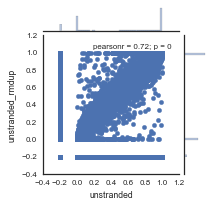

In [62]:
sns.jointplot('unstranded', 'unstranded_rmdup', wide_psi.fillna(-0.2), size=3)

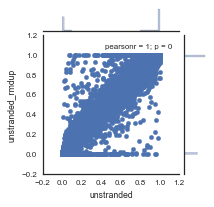

In [63]:
sns.jointplot('unstranded', 'unstranded_rmdup', wide_psi, size=3)

## Why is stranded bam messed up?

This event is Psi=1 in all

In [38]:
sample_id, event_id = 'CVN_01', 'isoform1=junction:chr10:102114390-102120490:+|isoform2=junction:chr10:102114390-102116288:+@exon:chr10:102116289-102116521:+@junction:chr10:102116522-102120490:+'

summary.query('(sample_id == @sample_id) & (event_id == @event_id)')

,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,sample_id,dataset
9269,isoform1=junction:chr10:102114390-102120490:+|...,NaN,NaN,0.0,NaN,46.0,96.0,NaN,Case 7: Inclusion,1.0,CVN_01,unstranded_rmdup
11127584,isoform1=junction:chr10:102114390-102120490:+|...,NaN,NaN,0.0,NaN,273.0,453.0,NaN,Case 7: Inclusion,1.0,CVN_01,stranded_bam
18949132,isoform1=junction:chr10:102114390-102120490:+|...,NaN,NaN,0.0,NaN,273.0,453.0,NaN,Case 8: Inclusion,1.0,CVN_01,stranded
31516451,isoform1=junction:chr10:102114390-102120490:+|...,NaN,NaN,0.0,NaN,273.0,453.0,NaN,Case 7: Inclusion,1.0,CVN_01,unstranded
44082567,isoform1=junction:chr10:102114390-102120490:+|...,NaN,NaN,0.0,NaN,46.0,96.0,NaN,Case 7: Inclusion,1.0,CVN_01,stranded_rmdup


In [40]:

summary.query('(sample_id == @sample_id) & (event_id == @pkm_mxe_event)')

,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,sample_id,dataset
9510891,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,51.0,53.0,0.0,NaN,0.0,Case 6: Exclusion,0.0,CVN_01,unstranded_rmdup
17999501,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,158.0,0.0,0.0,NaN,0.0,Case 4: Only one junction with sufficient reads,NaN,CVN_01,stranded_bam
27435693,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,NaN,158.0,124.0,0.0,NaN,19.0,Case 6: Unequal read coverage (one side has at...,NaN,CVN_01,stranded
40003012,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,NaN,158.0,124.0,0.0,NaN,19.0,Case 5: Unequal read coverage (one side has at...,NaN,CVN_01,unstranded
51038204,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,51.0,53.0,0.0,NaN,0.0,Case 6: Exclusion,0.0,CVN_01,stranded_rmdup


This event is Psi~1 in all but stranded_bam and stranded_rmdup

In [33]:
sample_id, event_id = 'CVN_01', 'isoform1=junction:chr10:101507148-101514285:+|isoform2=junction:chr10:101507148-101510125:+@exon:chr10:101510126-101510153:+@junction:chr10:101510154-101514285:+'
summary.query('(sample_id == @sample_id) & (event_id == @event_id)')

,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,sample_id,dataset
2691,isoform1=junction:chr10:101507148-101514285:+|...,NaN,NaN,0.0,NaN,54.0,54.0,NaN,Case 7: Inclusion,1.000000,CVN_01,unstranded_rmdup
11123697,isoform1=junction:chr10:101507148-101514285:+|...,NaN,NaN,0.0,NaN,157.0,0.0,NaN,Case 4: Only one junction with sufficient reads,NaN,CVN_01,stranded_bam
18943610,isoform1=junction:chr10:101507148-101514285:+|...,NaN,NaN,1.0,NaN,157.0,181.0,NaN,Case 11a: Isoform1 has 1+ junction with insuff...,0.994118,CVN_01,stranded
31510929,isoform1=junction:chr10:101507148-101514285:+|...,NaN,NaN,1.0,NaN,157.0,181.0,NaN,Case 19a: Isoform1 has 1+ junction with insuff...,0.994118,CVN_01,unstranded
44078680,isoform1=junction:chr10:101507148-101514285:+|...,NaN,NaN,0.0,NaN,54.0,54.0,NaN,Case 7: Inclusion,1.000000,CVN_01,stranded_rmdup


Something must have gone wrong when making the junction read file from the `stranded_bam` data for getting the strands because some junctions are NA when they shouldn't be 

## Make Wasabiplots

In [ ]:
from __future__ import print_function

import glob
bam_filenames = glob.glob('/home/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/*.bam')

sample_id = 'M2_02'

bam_filename = [x for x in bam_filenames if sample_id in x][0]
bam_filename

In [ ]:
mxe_events = pd.read_csv('outrigger_v2/index/mxe/events.csv')
print(mxe_events.shape)
mxe_events.head()

In [ ]:
mxe_event_bed = pd.read_table('outrigger_v2/index/mxe/event.bed', index_col=3, header=None)
print(mxe_event_bed.shape)
mxe_event_bed.head()

In [ ]:
pkm_mxe_event_bed = mxe_event_bed.loc[pkm_mxe_event]

In [ ]:
pkm_mxe_event_bed.max()

In [ ]:
pkm_mxe_event_bed.min()

In [ ]:
chrom = pkm_mxe_event_bed.iloc[0, 0]
start = pkm_mxe_event_bed.min()[1]
stop = pkm_mxe_event_bed.max()[2]
strand = '-'


In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


%matplotlib inline

import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

# not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)


In [ ]:
import pandas as pd
import os

bam_df = pd.Series(sorted(bam_filenames), name='bam').to_frame()
bam_df['sample_id'] = bam_df['bam'].map(lambda x: '_'.join(os.path.basename(x).split('.')[0].split('_')[:2]))
bam_df = bam_df.set_index('sample_id')
bam_df['phenotype'] = study.sample_id_to_phenotype
bam_df['pooled'] = study.metadata.data['pooled']
bam_df['outlier'] = study.metadata.data['outlier']
bam_df.head()

In [ ]:
import wasabiplot as wp

def wasabifacet(x, **kwargs):
    return wp.wasabiplot(x.iloc[0], **kwargs)

In [ ]:
bam_df_samples = bam_df.loc[sample_ids]
print(bam_df_samples.shape)
bam_df_samples.head()

In [ ]:
%pdb

In [ ]:
g = sns.FacetGrid(bam_df_samples, row='bam', hue='phenotype', size=1.5, aspect=8)
g.map(wasabifacet, 'bam', chrom=chrom, start=start, stop=stop, strand=strand, warn_skipped=False)